<center><img src="https://media.licdn.com/dms/image/D4D0BAQHOLNi1297n2g/company-logo_200_200/0/1697658047551?e=1707955200&v=beta&t=PaSbWR-y89ji3AKX9SAQs4dHjmhhgENXgMzasUTpgrE"></center>

This Project is the traditionnal machine learning project, the main objective is to practice `Python`, `Data Cleaning`, `Data Visualization` `Machine Learning`.

The main objectif is to train a machine learning model for titanic prediction based on a structured data.

# Set Up the envirement  
* Importing all necessary libraries : 

In [2]:
import pandas as pd
import math as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

* Importing DataSet from `CSV` file using Pandas : 

In [3]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the data frame : 

In [4]:
df.shape

(891, 12)

So we have $891$ of rows and $12$ colomns , till now we have $11$ features and $x_1, x_2, ..., x_{11}$ and two type of decisions $y = \{0, 1\}$ .

Actually we don't need all the data, just some of them are enagh to make a good decisions :

# Data Cleaning : 

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

For our case we only need age, Sex and Class

In [8]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


For the nullable values in age column, we attribute the mean of women to each null woman and mean for male 

In [10]:
meanMale = df.loc[df["Sex"] == 'male', "Age"].mean()
meanFemale = df.loc[df["Sex"] == 'female', "Age"].mean()

In [11]:
df.loc[df["Sex"] == 'male', "Age"] = df.loc[df["Sex"] == 'male', "Age"].fillna(meanMale)
df.loc[df["Sex"] == 'female', "Age"] = df.loc[df["Sex"] == 'female', "Age"].fillna(meanFemale)

In [12]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.000000
1,1,1,female,38.000000
2,1,3,female,26.000000
3,1,1,female,35.000000
4,0,3,male,35.000000
...,...,...,...,...
886,0,2,male,27.000000
887,1,1,female,19.000000
888,0,3,female,27.915709
889,1,1,male,26.000000


We need to affect man to 0 and female to 1 

In [13]:
df["Sex"] = df["Sex"].map({'male': 1, 'female': 0})

In [14]:
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,27.915709
889,1,1,1,26.000000


# Preparing our model 

In [15]:
sns.set()

In [16]:
df.dtypes.value_counts()

int64      3
float64    1
Name: count, dtype: int64

Convert all datatypes within pandas dataframe to Float32

Split dataset into Train/Test [80:20]

In [17]:
new_df = pd.get_dummies(df)
print(new_df.shape)
new_df.head()

(891, 4)


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [18]:
target = "Survived"
predictors = list(set(new_df.columns) - set([target]))
print("new_df.shape:", new_df.shape)
predictors

new_df.shape: (891, 4)


['Pclass', 'Sex', 'Age']

In [19]:
new_df = new_df.astype(np.float32)

In [20]:
X_train, x_test, Y_train, y_test = train_test_split(new_df[predictors], new_df[target], test_size=0.2)

In [21]:
new_df.dtypes

Survived    float32
Pclass      float32
Sex         float32
Age         float32
dtype: object

Convert Pandas dataframe, first to numpy and then to Torch Tensors

In [22]:
X_train = torch.from_numpy(X_train.values)
x_test = torch.from_numpy(x_test.values)
Y_train = torch.from_numpy(Y_train.values).reshape(-1,1)
y_test = torch.from_numpy(y_test.values).reshape(-1,1)

In [23]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: torch.Size([712, 3])
x_test.shape: torch.Size([179, 3])
Y_train.shape: torch.Size([712, 1])
y_test.shape: torch.Size([179, 1])


Starting training model and evaluating its performance :

How to format the data for Torch dataset (Optional for this problem)

In [27]:
class Data(Dataset):
    def __init__(self, X, Y):
        self.x = X
        self.y = Y
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

dataset = Data(X_train, Y_train)

In [36]:
dataset.__getitem__(10)

(tensor([ 3.,  0., 45.]), tensor([0.]))

In [37]:
class logistic_regression(nn.Module):
    def __init__(self, in_size):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(in_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

In [42]:
criterion = nn.BCELoss()
train_loader = DataLoader(dataset=dataset, batch_size=1)

model = logistic_regression(3)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [49]:
def train_model(model, optimizer, loss_function, num_epochs, batch_size, X_train, Y_train, lambda_L1=0.0):
    loss_across_epochs = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        model.train()

        for i in range(0, X_train.shape[0], batch_size):
            input_data = X_train[i:min(X_train.shape[0], i + batch_size)]
            labels = Y_train[i:min(X_train.shape[0], i + batch_size)]

            optimizer.zero_grad()
            output_data = model(input_data)
            loss = loss_function(output_data, labels)

            L1_loss = 0
            for p in model.parameters():
                L1_loss += p.abs().sum()

            loss = loss + lambda_L1 * L1_loss

            loss.backward()
            optimizer.step()
            train_loss += loss.item() * input_data.size(0)

        loss_across_epochs.append(train_loss / X_train.size(0))

        if epoch % 10 == 0:
            print("Epoch: {} - Loss: {:.4f}".format(epoch, train_loss / X_train.size(0)))

    return loss_across_epochs

In [61]:
TM = train_model(model=model, optimizer=optimizer, loss_function=criterion, batch_size = 1, num_epochs = 100  ,X_train=X_train, Y_train=Y_train, lambda_L1= 0.01)

Epoch: 0 - Loss: 1.8886
Epoch: 10 - Loss: 1.8591
Epoch: 20 - Loss: 1.8342
Epoch: 30 - Loss: 1.8149
Epoch: 40 - Loss: 1.8051
Epoch: 50 - Loss: 1.7998
Epoch: 60 - Loss: 1.8023
Epoch: 70 - Loss: 1.7977
Epoch: 80 - Loss: 1.7887
Epoch: 90 - Loss: 1.7818


In [66]:
def evaluate_model(model, x_test, y_test, X_train, Y_train, loss_values):
    model.eval()

    y_test_prob = model(x_test)
    y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

    Y_train_prob = model(X_train)
    Y_train_pred = np.where(Y_train_prob > 0.5, 1, 0)

    print("\nModel Performance : ")
    print(" * Training Accuracy-", round(accuracy_score(Y_train, Y_train_pred), 3))
    print(" * Training Precision-", round(precision_score(Y_train, Y_train_pred), 3))
    print(" * Training Recall-", round(recall_score(Y_train, Y_train_pred), 3))
    print(" * Training ROCAUC", round(roc_auc_score(Y_train, Y_train_prob.detach().numpy()), 3))

    print(" * Validation Accuracy-", round(accuracy_score(y_test, y_test_pred), 3))
    print(" * Validation Precision-", round(precision_score(y_test, y_test_pred), 3))
    print(" * Validation Recall-", round(recall_score(y_test, y_test_pred), 3))
    print(" * Validation ROCAUC", round(roc_auc_score(y_test, y_test_prob.detach().numpy()), 3))
    print("\n")

    # Plot the Loss curve and ROC Curve
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_values)  # Use the provided loss_values directly
    plt.title('Loss across epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')

    plt.subplot(1, 2, 2)
    fpr_v, tpr_v, _ = roc_curve(y_test, y_test_prob.detach().numpy())
    roc_auc_v = auc(fpr_v, tpr_v)

    fpr_t, tpr_t, _ = roc_curve(Y_train, Y_train_prob.detach().numpy())
    roc_auc_t = auc(fpr_t, tpr_t)

    plt.title('Receiver Operating Characteristic: Validation')
    plt.plot(fpr_v, tpr_v, 'b', label='Validation AUC = %0.2f' % roc_auc_v)
    plt.plot(fpr_t, tpr_t, 'r', label='Training AUC = %0.2f' % roc_auc_t)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Model Performance : 
 * Training Accuracy- 0.65
 * Training Precision- 0.857
 * Training Recall- 0.089
 * Training ROCAUC 0.757
 * Validation Accuracy- 0.626
 * Validation Precision- 0.875
 * Validation Recall- 0.096
 * Validation ROCAUC 0.734




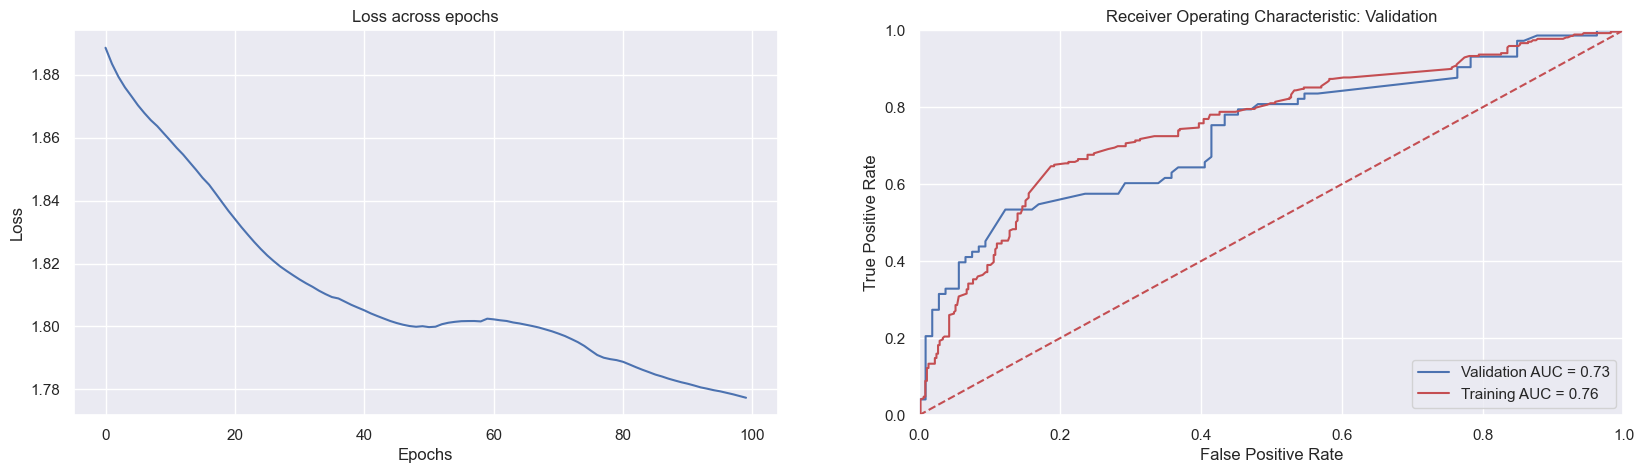

In [67]:
evaluate_model(model,x_test,y_test,X_train,Y_train,TM)

In [85]:
x = torch.tensor([[2, 1, 85]], dtype=float)
x

tensor([[ 2.,  1., 85.]], dtype=torch.float64)

In [86]:
yhat = model(x)

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float